<a href="https://colab.research.google.com/github/Rakin96/my_code/blob/main/task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files
import numpy as np

In [ ]:
import sklearn
from sklearn import preprocessing
import imblearn
from collections import Counter
from matplotlib import pyplot
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
pip install pycm==3.1

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 571 kB 9.3 MB/s 


In [ ]:
uploaded=files.upload()

Saving ecoli.csv to ecoli.csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['ecoli.csv']))

In [ ]:
df.shape

(335, 8)

In [ ]:
target = df.values[:,-1]
feature=df.values[:,:-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))


Class=cp, Count=142, Percentage=42.388%
Class=im, Count=77, Percentage=22.985%
Class=imS, Count=2, Percentage=0.597%
Class=imL, Count=2, Percentage=0.597%
Class=imU, Count=35, Percentage=10.448%
Class=om, Count=20, Percentage=5.970%
Class=omL, Count=5, Percentage=1.493%
Class=pp, Count=52, Percentage=15.522%


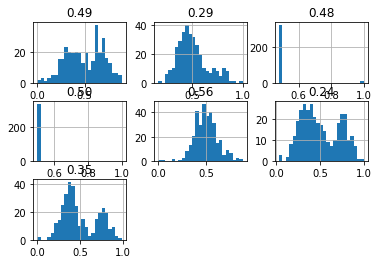

In [ ]:
df.hist(bins=25)
# show the plot
pyplot.show()

In [ ]:
LE=preprocessing.LabelEncoder()
y=LE.fit_transform(target)
y = np_utils.to_categorical(y)
"""from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(target)"""
"""from sklearn.preprocessing import MultiLabelBinarizer
LE=MultiLabelBinarizer()
y=LE.fit_transform(target)"""

'from sklearn.preprocessing import MultiLabelBinarizer\nLE=MultiLabelBinarizer()\ny=LE.fit_transform(target)'

In [ ]:
x=feature

In [ ]:
#Splitting dataset into train and test while maintaing output class ration same
X1, x_test, Y1, y_test = train_test_split(x, y,stratify=y, test_size=0.1)

In [ ]:
x_train,x_val,y_train,y_val= train_test_split(X1, Y1,stratify=Y1, test_size=0.2)

In [ ]:
x_train=x_train.astype('float64')
y_train=y_train.astype('float64')
x_val=x_val.astype('float64')
y_val=y_val.astype('float64')
x_test=x_test.astype('float64')
y_test=y_test.astype('float64')

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights = class_weight.compute_sample_weight('balanced',y_train)

In [ ]:
#to insert class weight in Keras, I need to pass class weight as a dictionary
class_weights = dict(enumerate(class_weights))

In [ ]:
import keras

In [ ]:
metrics = [keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
           keras.metrics.AUC(name='auc')]

NameError: ignored

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=7,input_dim=7,activation='relu'),
                           tf.keras.layers.Dense(units=64,activation='relu'),
                           tf.keras.layers.Dense(units=128,activation='relu'),
                           tf.keras.layers.Dense(12,activation='relu'),
                           tf.keras.layers.Dense(24,activation='relu'),
                           tf.keras.layers.Dense(16,activation='relu'),
                           tf.keras.layers.Dense(8,activation='softmax')
                           ])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=metrics)


In [ ]:

history=model.fit(x_train,y_train,epochs=500,class_weight=class_weights,validation_data=(x_val,y_val))

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.9715 - categorical_accuracy: 0.6383 - auc: 0.9185


[1.9714782238006592, 0.6382852792739868, 0.9185155630111694]

In [ ]:
yhat=model.predict(x_test)

In [ ]:
def result(a):
  class7=np.round(yhat[:,a])
  class6_true=y_test[:,a]
  return len(class6_true[class6_true==1]),len(class7[class7==1])


In [ ]:
clas=['cp','im','imS','imL','imU','om','omL','pp']

In [ ]:
for i in range(0,len(clas)):
  tr,pr=result(i)
  print('class',clas[i],'Actually present in test data-->',tr)
  print('class',clas[i],'number preicted By Model-->',pr)

class cp Actually present in test data--> 14
class cp number preicted By Model--> 14
class im Actually present in test data--> 8
class im number preicted By Model--> 1
class imS Actually present in test data--> 0
class imS number preicted By Model--> 0
class imL Actually present in test data--> 0
class imL number preicted By Model--> 0
class imU Actually present in test data--> 4
class imU number preicted By Model--> 8
class om Actually present in test data--> 2
class om number preicted By Model--> 2
class omL Actually present in test data--> 1
class omL number preicted By Model--> 0
class pp Actually present in test data--> 5
class pp number preicted By Model--> 8


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from pycm import ConfusionMatrix

In [ ]:
yh=np.round(yhat)

In [ ]:
y_t=np.array( [ np.argmax ( y, axis=None, out=None ) for y in y_test] )
yh=np.array( [ np.argmax ( y, axis=None, out=None ) for y in yh] )

In [ ]:
cm=ConfusionMatrix(actual_vector=y_t,predict_vector=yh)

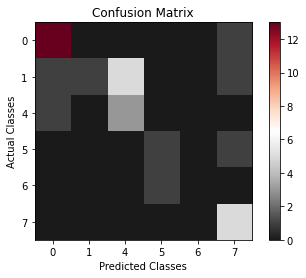

In [ ]:
cm.plot(cmap='RdGy_r')